#                    Netflix Data *Analysis*

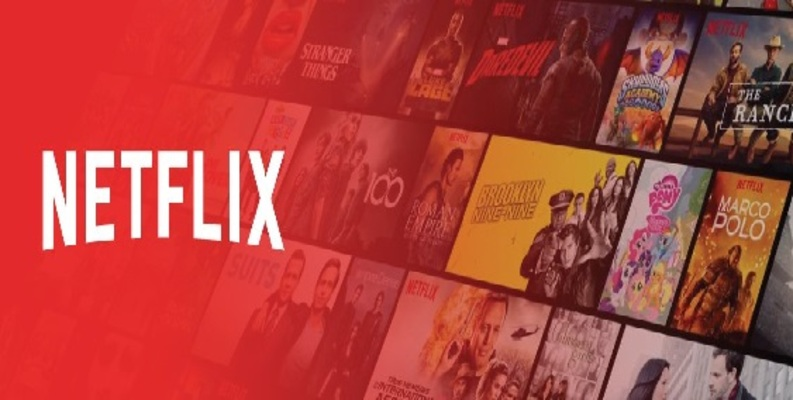

# Importing Libraries

In [16]:
# Importing below Python libraries for data analysis
import pandas as pd
import numpy as np
import plotly.express as px 
from textblob import TextBlob 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.offline as pyo


# Reading Dataset

In [17]:
# Read the Netflix titles data from a compressed CSV file
df = pd.read_csv('/content/netflix_titles.csv.zip')

# Display the first few rows of the DataFrame
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# Summary About Data

In [18]:
# Checking Shape of Dataset
df.shape

(8807, 12)

In [19]:
# Different columns present in dataset
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [20]:
# Checking Data-Types of all Columns
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [21]:
# Generate descriptive statistics of the DataFrame
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [22]:
# Get information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


## Null Values Handling

In [23]:
df.shape

(8807, 12)

In [24]:
# Check for missing values in the DataFrame
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

### As Rajiv Cilaka is an Indian Directors who helmed the project of directing 'Chota Bheem', I have filled his country which were null values

 By this way also we can fill null values for some section of the data based on condition.

In [25]:
# Update 'country' values for rows where 'director' is 'Rajiv Chilaka'
df.loc[df['director'] == 'Rajiv Chilaka', 'country'] = 'India'

## Droping rest of null values as we have abandance of data-points in out dataset.

In [26]:
# Dropping null values from datsset
df.dropna(inplace=True)

In [27]:
# Checking the shape of dataset after dropping null values
df.shape

(5346, 12)

In [28]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

# Exploratory Data analysis of netflix data
------------------------------************-------------------------------------

# What type of show Netflix produces the most ?

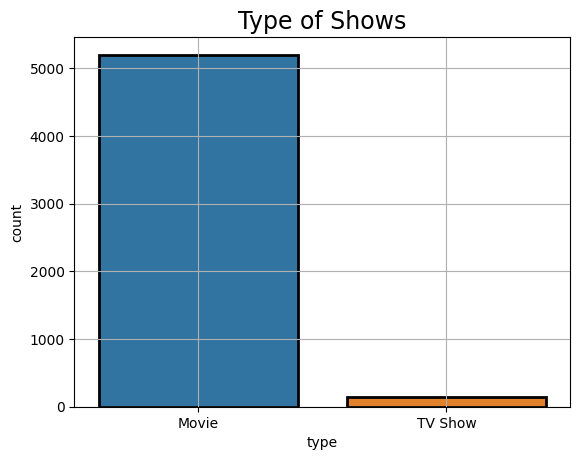

In [58]:
# Countplot on the type column of the dataset.
sns.countplot(x='type',data=df,ec='black',lw=2)
plt.title('Type of Shows',fontsize=17)
plt.grid(True)
plt.show()

# Top-10 Content Ratings on Netflix

In [29]:
# Calculate the counts of each content rating
rating_counts = df['rating'].value_counts().head(10)

# Create a pie chart using Plotly Express
pieChart = px.pie(rating_counts, values='counts', names='rating',
                  title='Distribution of Top-10 Content Ratings on Netflix',
                  color_discrete_sequence=px.colors.qualitative.Set3)

# Display the pie chart
pieChart.show()

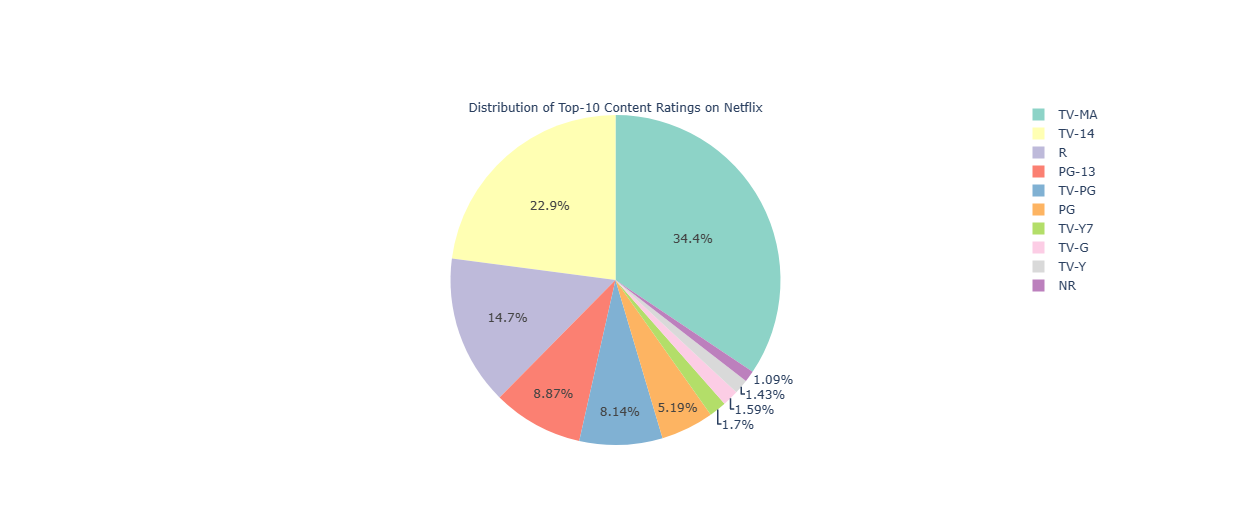

# Top 10 Directors on Netflix

In [30]:
# Group the DataFrame by director and calculate the count of shows for each director
director_counts = df.groupby('director').size().reset_index(name='count')

# Sort the directors based on the count in descending order and select the top 10 directors
top_directors = director_counts.sort_values('count', ascending=False).head(10)

# Create a bar chart using Plotly Express
bar_chart = px.bar(top_directors, x='count', y='director', title='Top 10 Directors on Netflix')

# Show the bar chart
bar_chart.show()


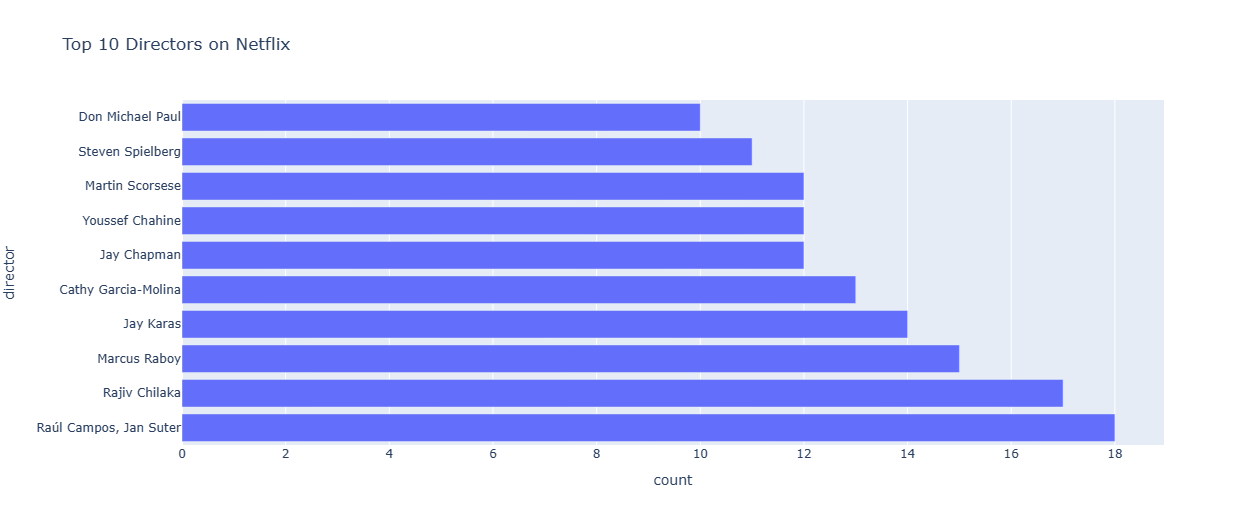

# Top-10 Actors with most occurance on Netflix

In [31]:
# Splitting the 'cast' column into multiple rows and counting the occurrences of each actor
lst = df['cast'].str.split(',', expand=True).stack().to_frame()
lst.columns = ['cast']
lst = lst.groupby('cast').size().reset_index(name='occurrence')

# Sorting the actors based on occurrence in descending order and selecting the top 10 actors
top_actors = lst.sort_values('occurrence', ascending=False).head(10)

# Creating a bar chart using Plotly Express
bar_chart = px.bar(top_actors, x='cast', y='occurrence', title='Top 10 Actors with Most Occurrences on Netflix')

# Show the bar chart
bar_chart.show()

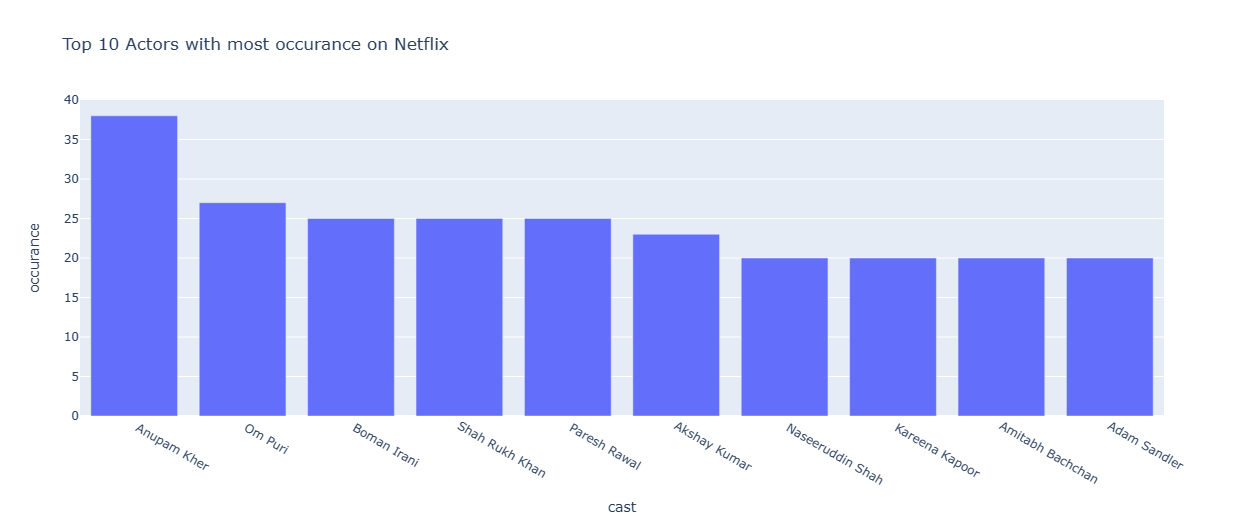

# Trend of content produced over the years on Netflix

In [32]:
# Selecting the 'type' and 'release_year' columns
df1 = df[['type', 'release_year']]

# Grouping by 'type' and 'release_year' and counting the occurrences
df1 = df1.groupby(['type', 'release_year']).size().reset_index(name='count')

# Filtering the data for release years from 2010 onwards
df1 = df1[df1['release_year'] >= 2010]

# Creating a line chart using Plotly Express
line_chart = px.line(df1, x='release_year', y='count', color='type', title='Trend of Content Produced Over the Years on Netflix')

# Show the line chart
line_chart.show()

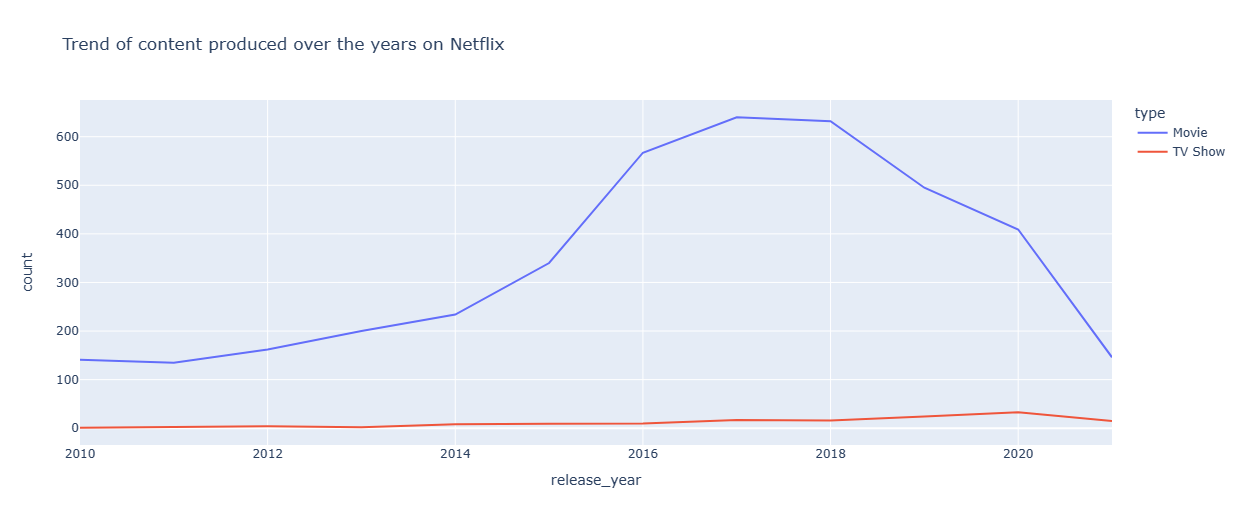

Trend of content produced over the years on Netflix

<Axes: xlabel='release_year', ylabel='d'>

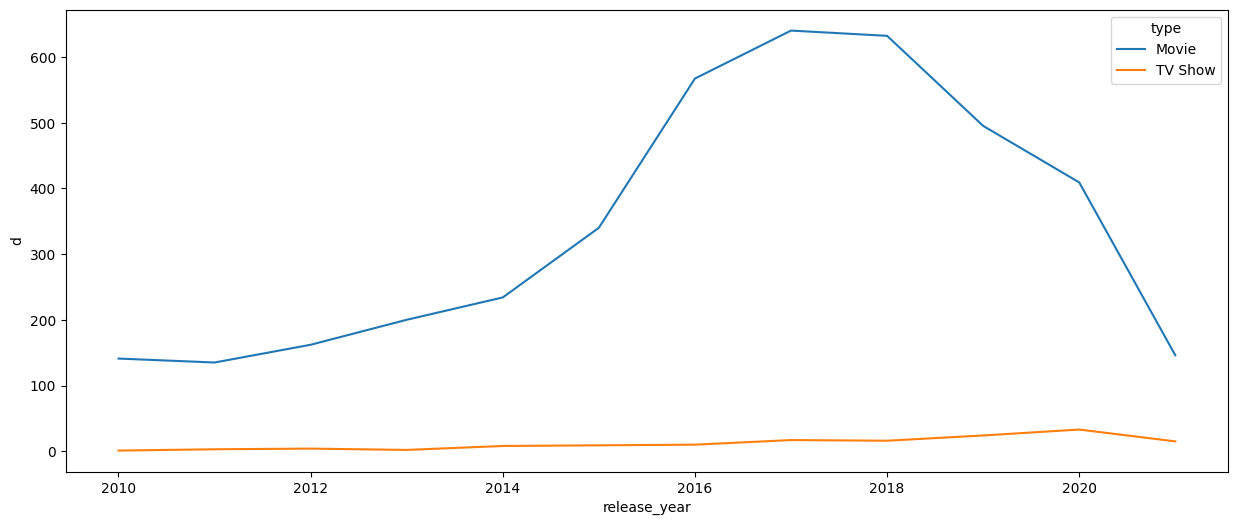

In [33]:
# Set the figure size
plt.figure(figsize=(15, 6))

# Grouping and counting occurrences
df1 = df.groupby(['type', 'release_year']).agg(d=('release_year', 'count'))

# Resetting the index
df1 = df1.reset_index()

# Filtering the data for release years from 2010 onwards
df1 = df1[df1['release_year'] >= 2010]

# Creating a line plot using Seaborn
sns.lineplot(x='release_year', y='d', data=df1, hue='type')

## We can know the sentiments of a sentence by using below method.
## Now we have description columns and we will try to find the sentiment of that movie and also see how movies sentiments are changing over the years

In [34]:
# Analyzing sentiment of a text using TextBlob
z = 'my name is rahul singh. I am going to become a data analyst'

# Creating a TextBlob object with the text
testimonial = TextBlob(z)

# Calculating the sentiment polarity of the text
p = testimonial.sentiment.polarity

# Determining the sentiment label based on polarity
if p == 0:
    sent = 'Neutral'
elif p > 0:
    sent = 'Positive'
else:
    sent = 'Negative'

# Printing the sentiment label
print(sent)

Neutral


# Sentiment of content on Netflix

In [35]:
# Analyzing sentiment of Netflix content descriptions and visualizing the results

# Selecting the 'release_year' and 'description' columns from the dataframe
dfx = df[['release_year', 'description']]

# Renaming the 'release_year' column to 'Release Year'
dfx = dfx.rename(columns={'release_year': 'Release Year'})

# Looping through each row of the dataframe
for index, row in dfx.iterrows():
    # Extracting the description from the row
    z = row['description']
    # Creating a TextBlob object from the description
    testimonial = TextBlob(z)
    # Calculating the sentiment polarity of the description
    p = testimonial.sentiment.polarity
    # Determining the sentiment label based on polarity
    if p == 0:
        sent = 'Neutral'
    elif p > 0:
        sent = 'Positive'
    else:
        sent = 'Negative'
    # Assigning the sentiment label to the 'Sentiment' column in the corresponding row
    dfx.loc[[index], 'Sentiment'] = sent

# Grouping the data by 'Release Year' and 'Sentiment', and calculating the count of each group
dfx = dfx.groupby(['Release Year', 'Sentiment']).size().reset_index(name='Total Content')

# Filtering the data for release years starting from 2010
dfx = dfx[dfx['Release Year'] >= 2010]

# Creating a bar chart to visualize the sentiment distribution of content over the years
fig4 = px.bar(dfx, x="Release Year", y="Total Content", color="Sentiment", title="Sentiment of content on Netflix")
pyo.iplot(fig4)

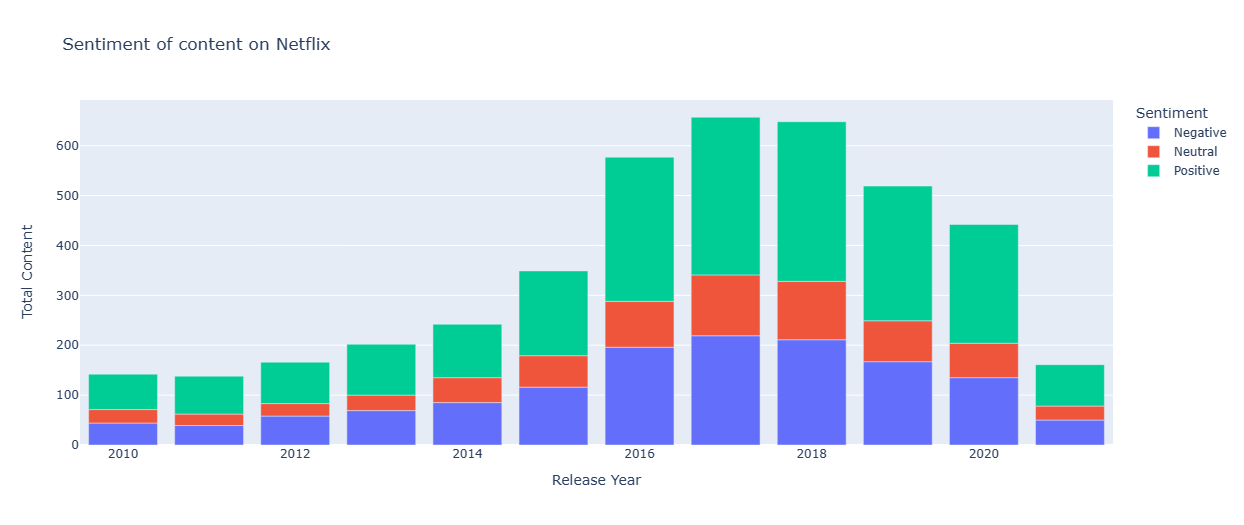

# Total content added throughout the year

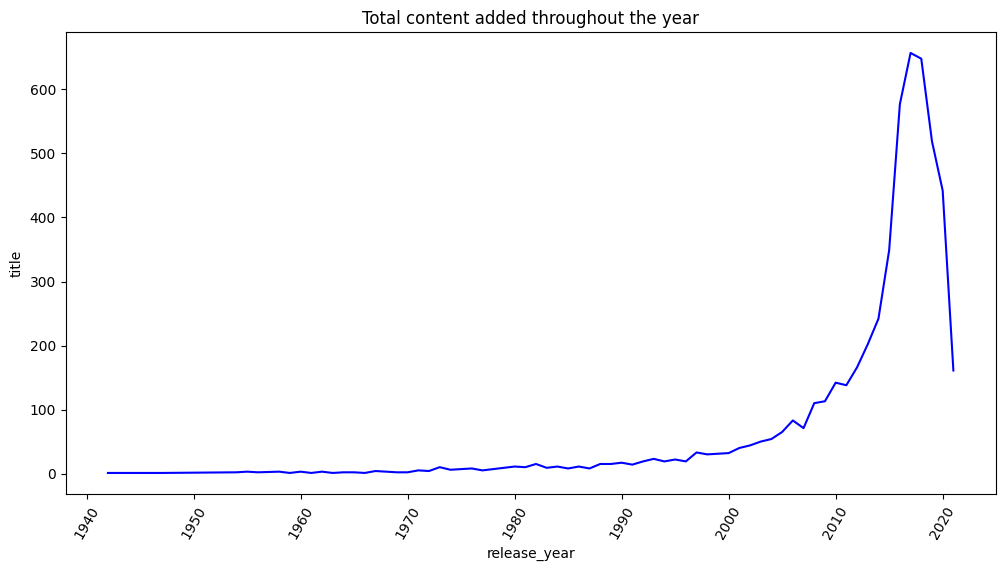

In [36]:
# Grouping the data by 'release_year' and counting the number of unique titles
df_year = df.groupby(['release_year']).agg({'title':'nunique'}).reset_index()

# Creating a line plot to visualize the total content added throughout the years
plt.figure(figsize=(12, 6))
sns.lineplot(x='release_year', y='title', data=df_year, color='blue')
plt.xticks(rotation=60)
plt.title('Total content added throughout the years')
plt.show()

# Content release over the Years on Netflix

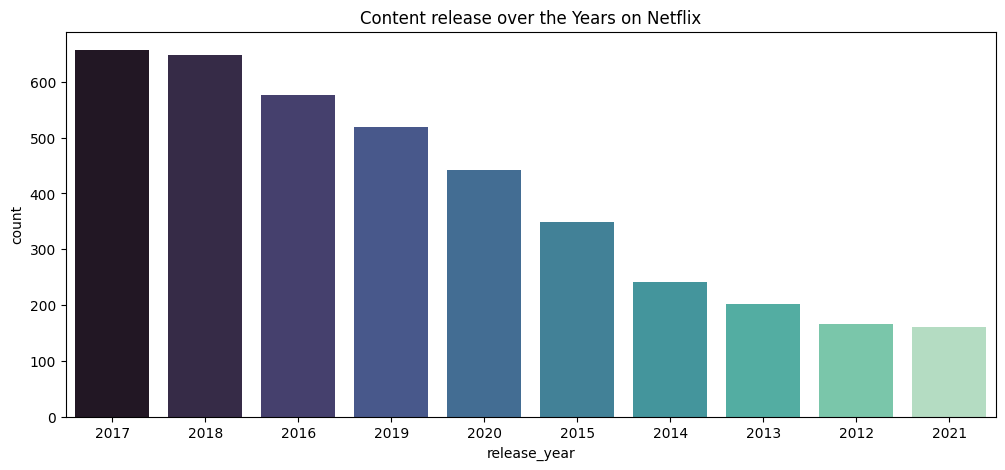

In [37]:
# Creating a count plot to visualize the content release over the years on Netflix
plt.figure(figsize=(12, 5))
sns.countplot(x='release_year', order=df['release_year'].value_counts().index[0:10], data=df, palette='mako')
plt.title('Content release over the Years on Netflix')
plt.show()

# Country Wise Content on Netflix

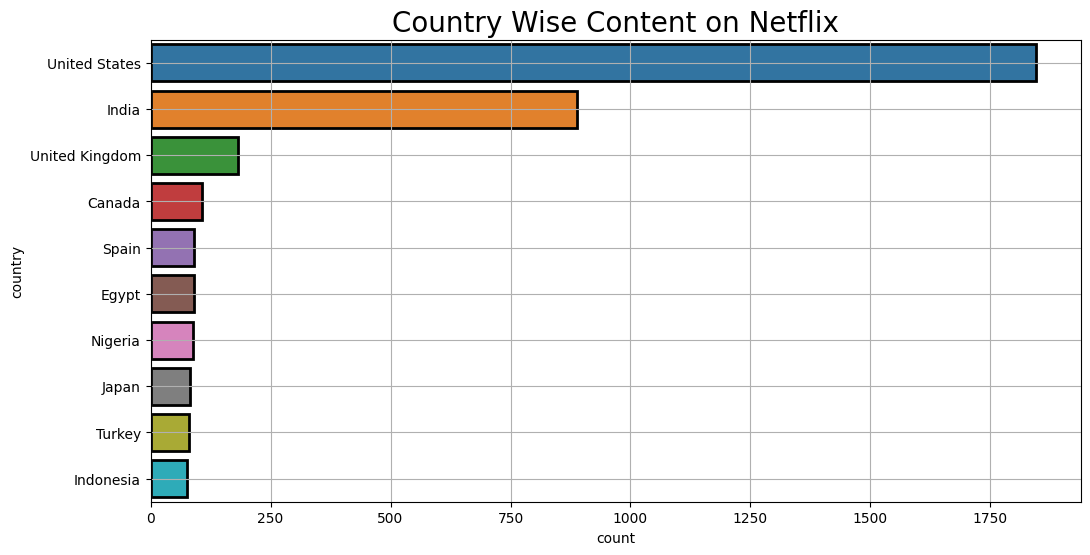

In [38]:
# Countplot of top 10 countries who produces most number of content on the Netflix.
plt.figure(figsize=(12,6))
sns.countplot(y='country',order=df['country'].value_counts().index[0:10],data=df,ec='black',lw=2)
plt.title('Country Wise Content on Netflix',fontsize=20)
plt.grid(True)
plt.show()

# What is the rating of most of the content on Netflix ?

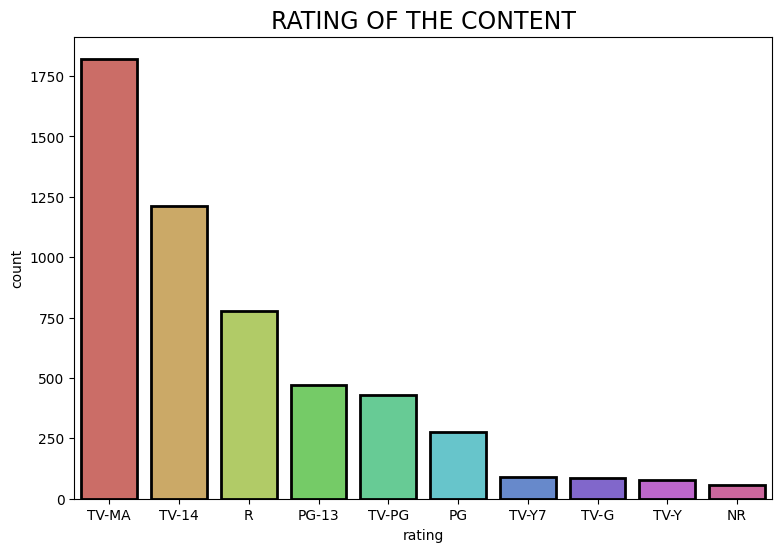

In [40]:
# Counplot of the top 10 rating of the content on the Netflix.
plt.figure(figsize=(9,6))
sns.countplot(x='rating',order=df['rating'].value_counts().index[0:10],data=df,ec='black',lw=2,palette='hls')
plt.title('RATING OF THE CONTENT',fontsize=17)
# plt.grid(True)
plt.show()

# MOVIES AND TV SHOWS VS COUNTRIES

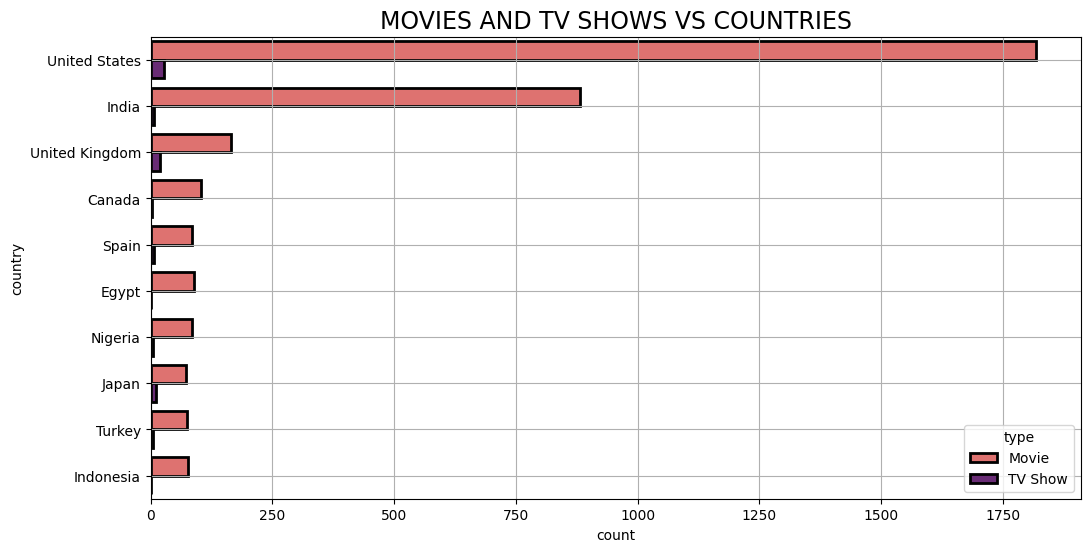

In [41]:
# Countplot about top 10 countries who produces most number of content on Netflix.
fig = plt.figure(figsize=(12,6))
sns.countplot(data = df,y = 'country', order = df["country"].value_counts().index[:10],hue = 'type',palette = 'magma_r',ec='black',lw=2)
plt.title("MOVIES AND TV SHOWS VS COUNTRIES",fontsize=17)
plt.grid(True)
plt.show()

# Top 5 Category in content on Netflix

In [44]:
# Name and count of the top 5 most category content on the Netflix.
x = df['listed_in'].value_counts().head()

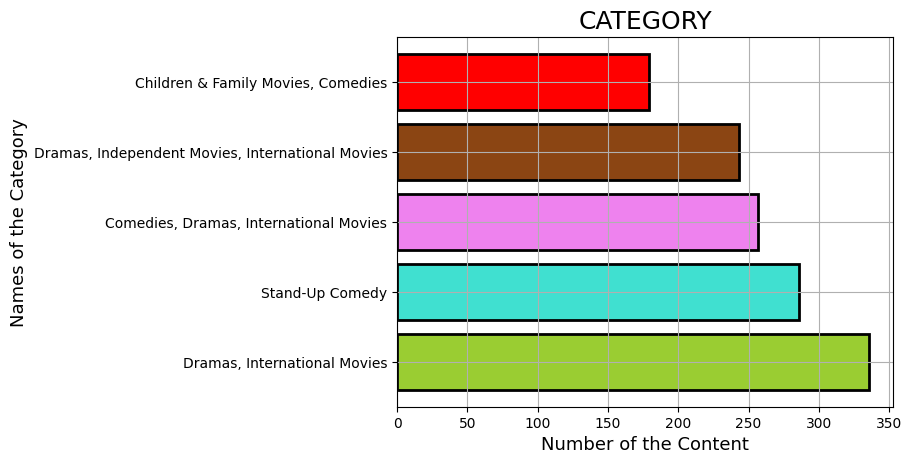

In [45]:
# Bar-plot for top 5 most category content on the Netflix.
mycolors = ["#9ACD32", "#40E0D0", "#EE82EE", "#8B4513",'#FF0000']
plt.barh(x.index, x.values, color=mycolors,ec='black',lw=2)
plt.title("CATEGORY",fontsize=18)
plt.xlabel("Number of the Content",fontsize=13)
plt.ylabel('Names of the Category',fontsize=13)
plt.grid(True)
plt.show()

# Which country produces most number of Movies and TV Shows on Netflix ?

In [56]:
# Datatset where type column has Movie only.
movie_countries=df[df['type']=='Movie']
movie_countries.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...
27,s28,Movie,Grown Ups,Dennis Dugan,"Adam Sandler, Kevin James, Chris Rock, David S...",United States,"September 20, 2021",2010,PG-13,103 min,Comedies,Mourning the loss of their beloved junior high...


In [47]:
# Counts of the top countries who producing most number of movies on Netflix.
movie_countries['country'].value_counts()

United States                   1819
India                            882
United Kingdom                   164
Canada                           104
Egypt                             90
                                ... 
Spain, United Kingdom              1
Canada, Norway                     1
France, Senegal, Belgium           1
Uruguay, Guatemala                 1
United Arab Emirates, Jordan       1
Name: country, Length: 594, dtype: int64

In [48]:
# Names of the top 10 countries who producing most number of movies on Netflix.
movie_countries['country'].value_counts().index[0:10]

Index(['United States', 'India', 'United Kingdom', 'Canada', 'Egypt',
       'Nigeria', 'Spain', 'Indonesia', 'Turkey', 'Japan'],
      dtype='object')

In [57]:
# Datatset where type column has TV Shows only.
tv_show_countries=df[df['type']=='TV Show']
tv_show_countries.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
198,s199,TV Show,King of Boys: The Return of the King,Kemi Adetiba,"Sola Sobowale, Toni Tones, Richard Mofe-Damijo...",Nigeria,"August 27, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas",Alhaja Eniola Salami starts anew and sets her ...
273,s274,TV Show,Gone for Good,Juan Carlos Medina,"Finnegan Oldfield, Nicolas Duvauchelle, Guilla...",France,"August 13, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas","Ten years after losing two loved ones, a man i..."
276,s277,TV Show,Valeria,Inma Torrente,"Diana Gómez, Silma López, Paula Malia, Teresa ...",Spain,"August 13, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, Spa...",A writer in creative and marital crises finds ...
297,s298,TV Show,Navarasa,"Bejoy Nambiar, Priyadarshan, Karthik Narain, V...","Suriya, Vijay Sethupathi, Revathy, Prakash Raj...",India,"August 6, 2021",2021,TV-MA,1 Season,TV Shows,"From amusement to awe, the nine human emotions..."


In [55]:
# Counts of the top countries who producing most number of TV Shows on Netflix.
tv_show_countries['country'].value_counts().head()

United States     27
United Kingdom    19
Japan             10
South Korea       10
Spain              7
Name: country, dtype: int64

In [51]:
# Names of the top 10 countries who producing most number of TV Shows on Netflix.
tv_show_countries['country'].value_counts().index[0:10]

Index(['United States', 'United Kingdom', 'Japan', 'South Korea', 'Spain',
       'India', 'Taiwan', 'France', 'Turkey', 'Thailand'],
      dtype='object')

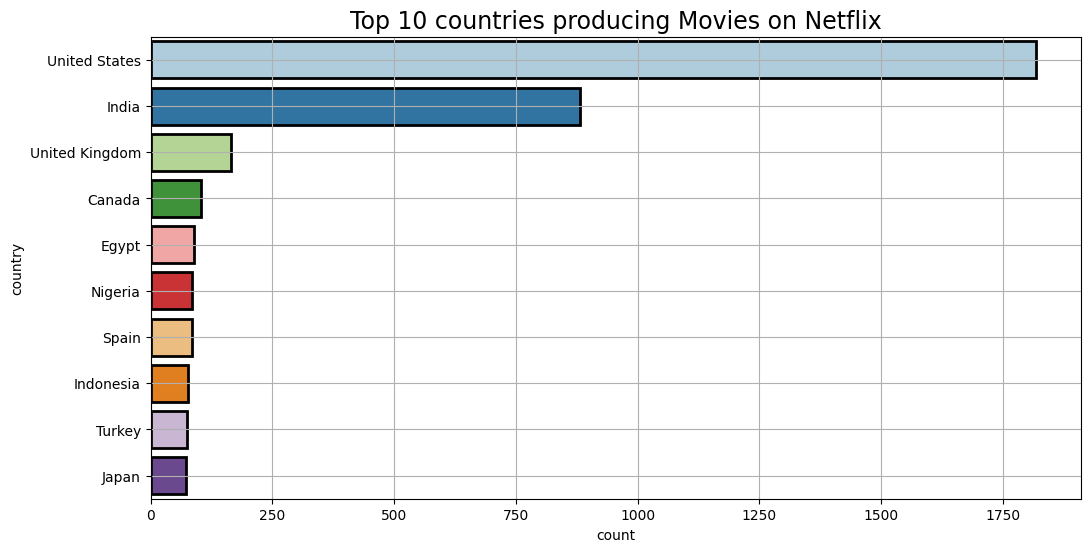

In [54]:
# Countplot of top 10 countries prodcing most number of movies on the Netflix.
plt.figure(figsize=(12,6))
sns.countplot(y='country',order=movie_countries['country'].value_counts().index[0:10],data=movie_countries,ec='black',lw=2,palette = "Paired")
plt.title('Top 10 countries producing Movies on Netflix',fontsize=17)
plt.grid(True)

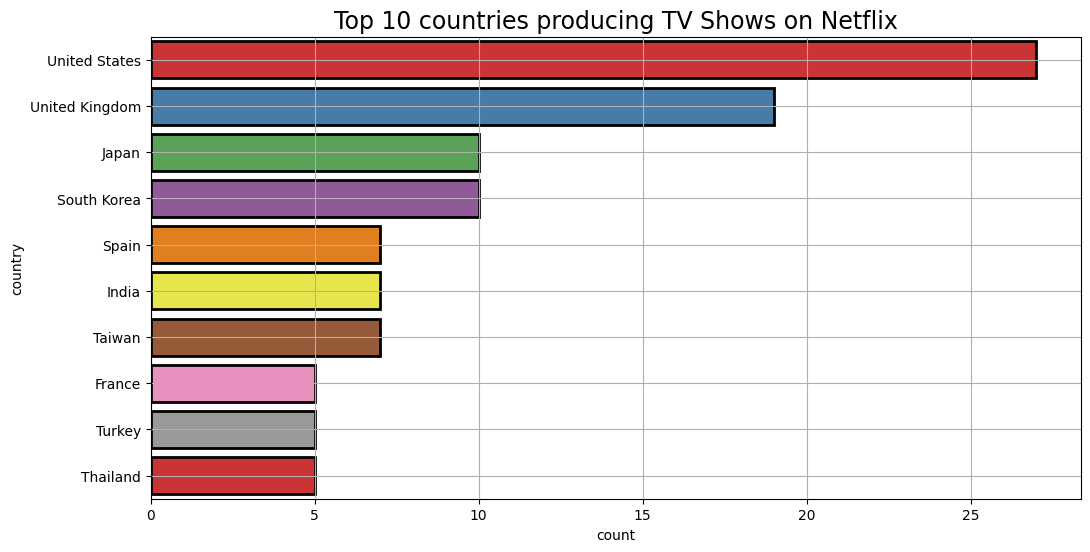

In [53]:
# Countplot of top 10 countries prodcing most number of TV Shows on the Netflix.
plt.figure(figsize=(12,6))
sns.countplot(y='country',order=tv_show_countries['country'].value_counts().index[0:10],data=tv_show_countries,ec='black',lw=2,palette = "Set1")
plt.title('Top 10 countries producing TV Shows on Netflix',fontsize=17)
plt.grid(True)
plt.show()

[ Rahul singh ] 19_may_2023 Netfilx data Analysis Project